# Improving Computer Vision Accuracy using Convolutions

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [2]:
""" Load dataset """
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
""" Callback to save time and prevent overfitting """
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('accuracy') > 0.99:
            print('\nExit training: 99% reached')
            self.model.stop_training = True

callbacks = AccuracyCallback()

In [4]:
""" Preprocess

The first convolution expects a single tensor containing everything.
So instead of 60K (28, 28, 1) items in a list, we have a single, 4D list that is (60000, 28, 28, 1)

* If you don't do this, you'll get an error since the Convolutions won't recognize the shape...
"""
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [5]:
""" Define Model

The first layer will start with 64 convolutions. This is arbitrary, but it's a good idea to start with multiples of 32.
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
""" Compile and Visualize summary """
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [7]:
""" Train Model """
model.fit(train_images, train_labels, epochs=10, callbacks=callbacks)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1247 - accuracy: 0.9613
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0416 - accuracy: 0.9870
Epoch 3/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0276 - accuracy: 0.9910
Exit training: 99% reached
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0276 - accuracy: 0.9910


In [8]:
""" Evaluate Model """
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.0285 - accuracy: 0.9904
0.9904000163078308


# Visualzing the Convolutions and Pooling

In [9]:
""" Print the first 100 labels in the test set.

Any with the value of 9 are shoes.
"""
print(test_labels[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


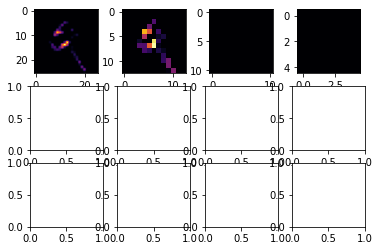

In [10]:
""" We can see how the machine is discovering patters on the features!

Let's take a look at the result of running the convolution on each and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.
"""
import matplotlib.pyplot as plt

figure, ax = plt.subplots(3, 4)
FIRST_IMAGE = 7
SECOND_IMAGE = 9
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0, 4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    ax[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    ax[0, x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    ax[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    ax[0, x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    ax[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    ax[0, x].grid(False)

## Exercise 1

> Change the 64 filters to 32 and 16. What happens?

The training time is faster the lower you go, but you lose accuracy as well

## Exercise 2

> Remove the final Convolution. What happens?

The training time is faster, but you lose accuracy

## Exercise 3

> Add more Convolutions. What impact does this have?

Training time goes up slightly, but accuracy went down

## Exercise 4

> Remove all Convolutions but the first? What happens?

Training time went down, but accuracy went up! However, the evulation accuracy was _much_ lower. This suggests that the model was overfitted.

## Exercise 5

Go through this [Notebook](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%206%20-%20Lesson%203%20-%20Notebook.ipynb) to see how filters are programmatically applied to images
